In [33]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [34]:
import sys

sys.path.append(
    "/data1/home/jyahn/JuYoungAhn/Mammo/BreastDensityLibrary/mammo2risk/mammo2risk"
)
from facade import MammoRiskManager
import pandas as pd
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [35]:
metadata = pd.read_csv("../../../GE+HO/Metadata/merged_v2.2.csv")

In [6]:
config = MammoRiskManager.get_config(
    "/data1/home/jyahn/mammo2risk/weights/config_v1.0.json"
)
mammo_manager = MammoRiskManager(**config)

Config path /data1/home/jyahn/mammo2risk/weights/config_v1.0.json


 60%|██████    | 3/5 [00:00<00:00, 26.61it/s]

Run mammo2risk-v0.1.0
Loading files...


100%|██████████| 5/5 [00:00<00:00, 8016.64it/s]


Extracting dicom information...
Loading Conventional Density Model...
1/5 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/13290335_1.dcm ...
Manufacturer : GE
2/5 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/21087749_1.dcm ...
Manufacturer : GE
3/5 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/15321033_0.dcm ...
Manufacturer : GE
4/5 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/15849579_0.dcm ...
Manufacturer : GE
5/5 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/11505055_0.dcm ...
Manufacturer : GE
Loading Mammo Risk Model...
1/5 Getting deep mammo risk score from /data1/home/jyahn/MammoData/Asan/Images/13290335_1.dcm ...
Manufacturer : GE
2/5 Getting deep mammo risk score from /data1/home/jyahn/MammoData/Asan/Images/21087749_1.dcm ...
Manufacturer : GE
3/5 Getting deep mammo risk score from /data1/home/jyahn/MammoData/Asan/Images/153210

,folder,file,view,side,cumulus(cm2),alto_cumulus(cm2),cirro_cumulus(cm2),breast_area(cm2),mammorisk
0,/data1/home/jyahn/MammoData/Asan/Images,13290335_1.dcm,CC,L,0.260331,0.000000,0.000000,154.139062,0.000066
1,/data1/home/jyahn/MammoData/Asan/Images,21087749_1.dcm,CC,L,24.892260,9.410209,0.137822,120.755410,0.047117
2,/data1/home/jyahn/MammoData/Asan/Images,15321033_0.dcm,CC,R,24.984142,13.445343,0.421124,125.609821,0.769433
3,/data1/home/jyahn/MammoData/Asan/Images,15849579_0.dcm,CC,R,2.618626,0.696769,0.099538,83.972137,0.012113
4,/data1/home/jyahn/MammoData/Asan/Images,11505055_0.dcm,CC,R,12.710290,4.218897,0.245018,74.332225,0.000173


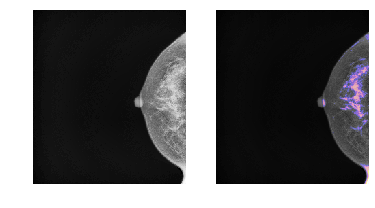

In [24]:
mammo_manager.mammo2risk(
    metadata["absolute_path"][0:5], img_save=True, img_save_path="."
)

1/2 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/13290335_1.dcm ...
Manufacturer : GE
2/2 Getting conventional densities from /data1/home/jyahn/MammoData/Asan/Images/21087749_1.dcm ...
Manufacturer : GE


array([[2.60331236e-01, 0.00000000e+00, 0.00000000e+00, 1.54139062e+02],
       [2.48922602e+01, 9.41020850e+00, 1.37822419e-01, 1.20755410e+02]])

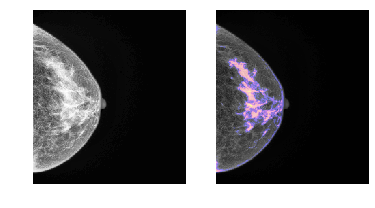

In [23]:
mammo_manager.get_conventional_densities_all(
    metadata["absolute_path"][0:2], img_save=True, img_save_path="."
) 